In [2]:
import cv2
import matplotlib.pyplot as plt
import utils as u
from importlib import reload
import numpy as np

# **Exercise week 10**
## **Exercise 10.1**

LOADING IMGS
SIFT
MATCHING


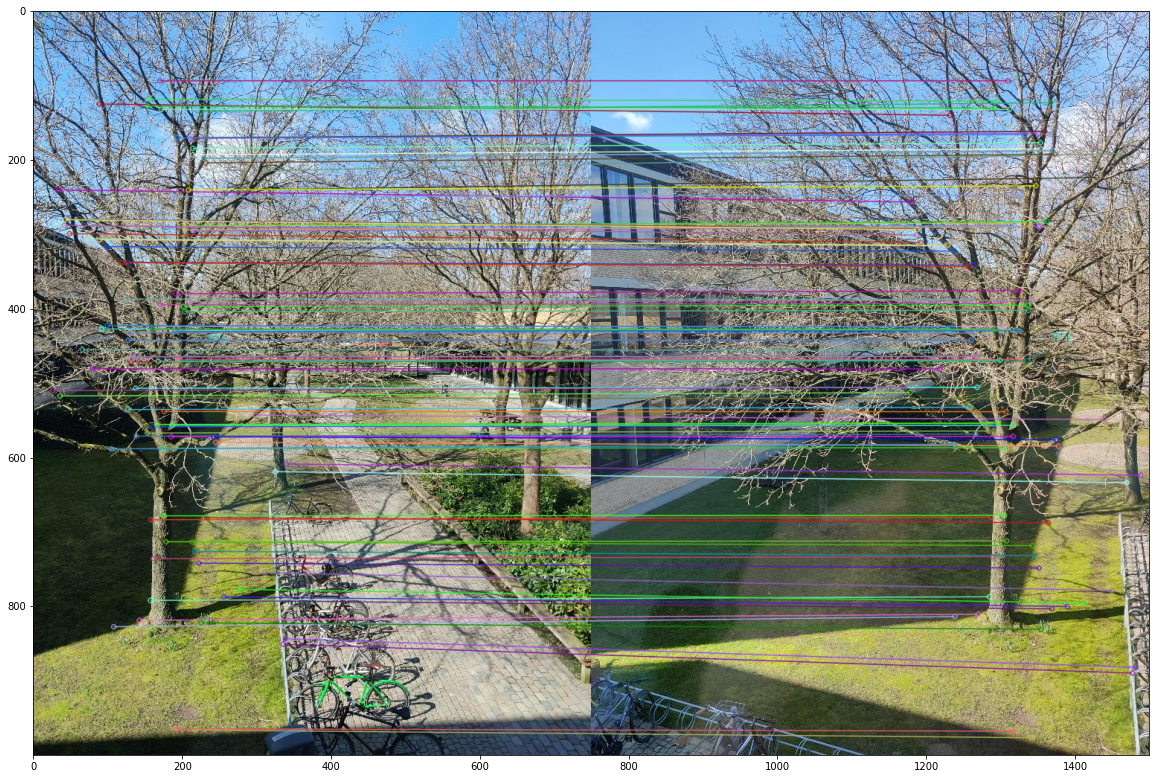

In [10]:
# Loading images
print("LOADING IMGS")
img1 = cv2.imread("../data/panorama/im1.jpg")
img2 = cv2.imread("../data/panorama/im2.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# SIFT
print("SIFT")
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

keyimg1 = cv2.drawKeypoints(img1, kp1, None)
keyimg2 = cv2.drawKeypoints(img2, kp2, None)

# FEATURE MATCHING
print("MATCHING")
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
good = [[m] for m,n in matches if m.distance < 0.75*n.distance]
good = sorted(good, key=lambda x:x[0].distance)[:100]
compare_img = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20, 20))
plt.imshow(compare_img)